# Possible Ecuadorian Bots in Chile
by Marcelo Rovai, UDD Chile<br>
from Dataset and generated by [Josh Russel](https://twitter.com/josh_emerson)<br>
- Premises:
- October 31, 2019

## Libraries & Setup

In [54]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [26]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
STOPWORDS = get_stop_words('spanish')

## Main Functions

In [16]:
def plot_feature(df, feat, prt=False, save_file_name=None):
    f, axes = plt.subplots(ncols=1, figsize=(10, 4))
    sns.despine(left=True)
    sns.distplot(df[feat],
                 color="m",
                 hist=False,
                 kde=True,
                 kde_kws={
                     'shade': True,
                     'linewidth': 3
                 })
    plt.suptitle(feat + " distribution", fontsize=20)
    plt.xlabel(feat,fontsize=15)
    plt.setp(axes, yticks=[])

    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

In [24]:
def word_cloud(wd_list, title = 'Word Cloud', d=30, prt=False, save_file_name=None):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color='white',
        colormap='inferno',
        width=1600,
        height=800,
        random_state=21,
        max_words=d,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.title(title+'\n', fontsize=20)
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    
    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

In [7]:
def jaccard_similarity(cont1, cont2):
    cont1 = "".join(re.split("[^a-zA-Z]*", cont1.lower()))
    cont2 = "".join(re.split("[^a-zA-Z]*", cont2.lower()))
    cont1_simil= set(cont1)
    cont2_simil = set(cont2)
    intersection = cont1_simil.intersection(cont2_simil)
    return float(len(intersection)) / (len(cont1_simil) + len(cont2_simil) - len(intersection))    

In [10]:
def add_new_users_feat(row): 
    user_name = str(row['screen_name'])
    name = str(row['name'])
    descr = str(row['description'])
    fols_cnt = row['followers_count']
    frs_cnt = row['friends_count']

    user_name_len = len(user_name)
    name_len = len(name)
    descr_len = len(descr)
    
    temp = re.findall(r'\d+', user_name)
    if len(temp) == 0:
        user_name_len_num = 0
    else:
        user_name_len_num = len(temp[0])
    
    try:
        simil_name = 100*(jaccard_similarity(user_name, name))
    except:
        simil_name = 0          
    
    if frs_cnt != 0:    
        fols_frs_ratio = round(fols_cnt/frs_cnt, 2)
    else:
        fols_frs_ratio = 0
        
    row['user_name_len'] = user_name_len
    row['name_len'] = len(name)
    row['user_name_len_num'] = user_name_len_num
    row['simil_name'] = simil_name
    row['descr_len'] = descr_len
    row['fols_frs_ratio'] = fols_frs_ratio
    return row

In [51]:
def plot_creat_at_timeline(df, title=None, prt=False, save_file_name=None):
    m = df.groupby('month')
    count = m['id'].count()
    timedict = count.to_dict()

    fig = plt.figure(figsize = (15,15))
    #plt.plot(list(timedict.keys()), list(timedict.values()))
    plt.xlabel('\nMonth of the year', fontsize = 15)
    plt.ylabel('Nº of Accounts', fontsize=15)
    plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
    sns.despine(left=True)
    sns.barplot(x = list(timedict.keys()), y = list(timedict.values()),  color = 'b', linewidth=1);
    plt.title(title, fontsize = 20);
    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

In [174]:
def plot_feat_comp(feat1, feat2, title=None, x_max = None, ):
    fig = plt.figure(figsize = (10,5))
    sns.distplot(feat1,
                 color="m",
                 label='Chile 2017',
                 hist=False,
                 kde=True,
                 kde_kws={
                     'shade': True,
                     'linewidth': 3
                 })
    plt.xlim(0, x_max)
    
    sns.distplot(feat2,
                 color="g",
                 label='Ecuador 2019',
                 hist=False,
                 kde=True,
                 kde_kws={
                     'shade': True,
                     'linewidth': 3
                 })
    plt.xlim(0, x_max)
    plt.suptitle(title + " distribution", fontsize=16)
    sns.despine(left=True)

## Dataset

Dataset generated by [Josh Russel](https://twitter.com/josh_emerson)<br>
- Premises:
    - "Due to some of the reports of "foreign influence" in #Chile I started looking around at some of the hashtags like  #LaMarchaMasGrandeDeChile2 and found around 1300 bots. These are Ecuadorian #bots according to their bio location (#Ecuador) and tweets."
    - "I put the accounts in a spreadsheet, then look for account similarities, created date/status counts/location/or common friends and followers." 
    - "Twitter data on a spreadsheet should be completely random, no patterns. If there is a pattern it’s bots."
    - User Blocked By Twitter

In [1]:
ls ../data

Ecuador bots account info 10.30.2019.xlsx


In [4]:
df = pd.read_excel("../data/Ecuador bots account info 10.30.2019.xlsx")
df.shape

(1315, 17)

In [5]:
df.head()

,id,screen_name,name,user_url,created_at,created_at_date,statuses_count,followers_count,friends_count,favorites_count,listed_count,location,verified,default_profile,default_profile_image,description,bio_url
0,1189202887215407105,MerlyVelasquez3,Merly Velasquez,https://twitter.com/MerlyVelasquez3,2019-10-29 15:30:00,2019-10-29,58,2,28,0,0,Ecuador,False,True,False,NaN,http://www.facebook.com/MerlyVelasquez3
1,1189202863261663234,banchon_jhon,Jhon Banchon,https://twitter.com/banchon_jhon,2019-10-29 15:30:00,2019-10-29,52,0,20,0,0,Ecuador,False,True,False,NaN,http://www.facebook.com/banchon_jhon
2,1189202818831388674,MichelleUrcuan1,Michelle Urcuango,https://twitter.com/MichelleUrcuan1,2019-10-29 15:30:00,2019-10-29,49,0,24,0,0,Ecuador,False,True,False,NaN,http://www.facebook.com/MichelleUrcuan1
3,1189179731679203329,laura_tipan,Laura tipán,https://twitter.com/laura_tipan,2019-10-29 13:58:00,2019-10-29,7,36,56,38,0,Ecuador,False,True,False,NaN,http://www.facebook.com/laura_tipan
4,1188770377222283264,BritoBr10,Maria Brito,https://twitter.com/BritoBr10,2019-10-28 10:52:00,2019-10-28,2,56,136,0,0,Ecuador,False,True,False,"Abogada, disfrutando la vida como si fuera una...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 17 columns):
id                       1315 non-null int64
screen_name              1315 non-null object
name                     1315 non-null object
user_url                 1315 non-null object
created_at               1315 non-null datetime64[ns]
created_at_date          1315 non-null datetime64[ns]
statuses_count           1315 non-null int64
followers_count          1315 non-null int64
friends_count            1315 non-null int64
favorites_count          1315 non-null int64
listed_count             1315 non-null int64
location                 1315 non-null object
verified                 1315 non-null bool
default_profile          1315 non-null bool
default_profile_image    1315 non-null bool
description              1250 non-null object
bio_url                  18 non-null object
dtypes: bool(3), datetime64[ns](2), int64(6), object(6)
memory usage: 147.8+ KB


## Cleaning and add features

In [31]:
df.description.fillna('', inplace=True)

In [11]:
df = df.apply(add_new_users_feat, axis=1)

In [40]:
def give_month(timestamp):
    month_string = timestamp.month
    return month_string

In [42]:
df['month'] = df['created_at'].apply(give_month)

In [49]:
df.head(2)

,id,screen_name,name,user_url,created_at,created_at_date,statuses_count,followers_count,friends_count,favorites_count,...,default_profile_image,description,bio_url,user_name_len,name_len,user_name_len_num,simil_name,descr_len,fols_frs_ratio,month
0,1189202887215407105,MerlyVelasquez3,Merly Velasquez,https://twitter.com/MerlyVelasquez3,2019-10-29 15:30:00,2019-10-29,58,2,28,0,...,False,,http://www.facebook.com/MerlyVelasquez3,15,15,1,100,3,0,10
1,1189202863261663234,banchon_jhon,Jhon Banchon,https://twitter.com/banchon_jhon,2019-10-29 15:30:00,2019-10-29,52,0,20,0,...,False,,http://www.facebook.com/banchon_jhon,12,12,0,100,3,0,10


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 24 columns):
id                       1315 non-null int64
screen_name              1315 non-null object
name                     1315 non-null object
user_url                 1315 non-null object
created_at               1315 non-null datetime64[ns]
created_at_date          1315 non-null datetime64[ns]
statuses_count           1315 non-null int64
followers_count          1315 non-null int64
friends_count            1315 non-null int64
favorites_count          1315 non-null int64
listed_count             1315 non-null int64
location                 1315 non-null object
verified                 1315 non-null bool
default_profile          1315 non-null bool
default_profile_image    1315 non-null bool
description              1315 non-null object
bio_url                  18 non-null object
user_name_len            1315 non-null int64
name_len                 1315 non-null int64
user_name_len_num  

## EDA

In [45]:
df['created_at'].min()

Timestamp('2019-01-08 01:23:00')

In [46]:
df['created_at'].max()

Timestamp('2019-10-29 15:30:00')

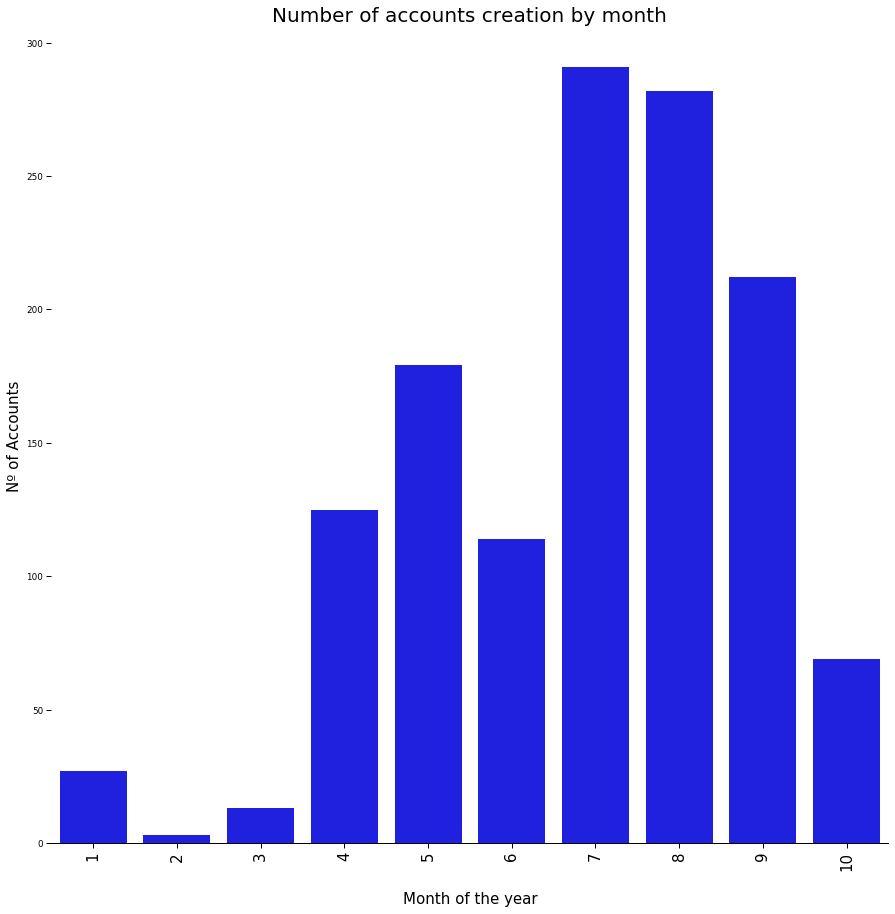

In [52]:
plot_creat_at_timeline(df, title='Number of accounts creation by month')

In [103]:
df.verified.value_counts()

False    1315
Name: verified, dtype: int64

In [104]:
df.location.value_counts()

Ecuador    1290
ecuador      17
ECUADOR       8
Name: location, dtype: int64

In [162]:
df.default_profile.value_counts()

True     1255
False      60
Name: default_profile, dtype: int64

In [209]:
len(df[df.description == ''])

65

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1315,1149541983916353152,21203434321085804,1082447621741047808,1133467174285287424,1152318875276627968,1165376038335100928,1189202887215407104
statuses_count,1315,2658,2812,0,317,1473,4478,12361
followers_count,1315,244,253,0,123,182,274,3805
friends_count,1315,363,365,0,180,289,444,4382
favorites_count,1315,850,1457,0,84,346,946,11277
listed_count,1315,2,2,0,1,2,3,14
user_name_len,1315,12,2,5,10,12,13,15
name_len,1315,14,3,2,12,14,15,44
user_name_len_num,1315,1,1,0,0,1,2,8
simil_name,1315,79,20,0,67,82,100,100


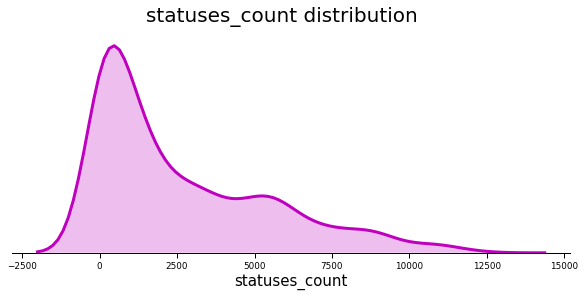

In [18]:
plot_feature(df, 'statuses_count')

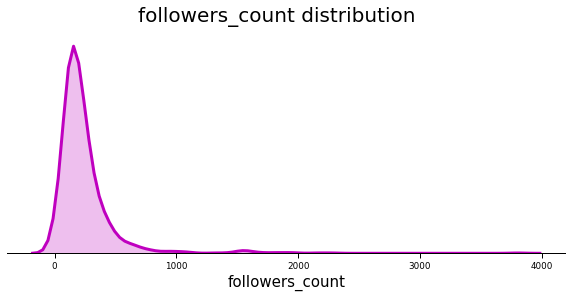

In [20]:
plot_feature(df, 'followers_count')

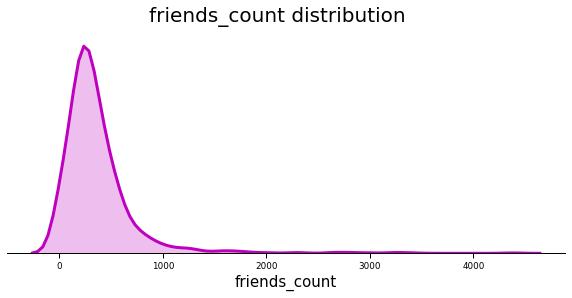

In [21]:
plot_feature(df, 'friends_count')

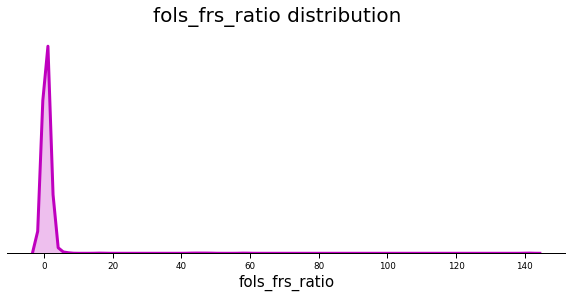

In [22]:
plot_feature(df, 'fols_frs_ratio')

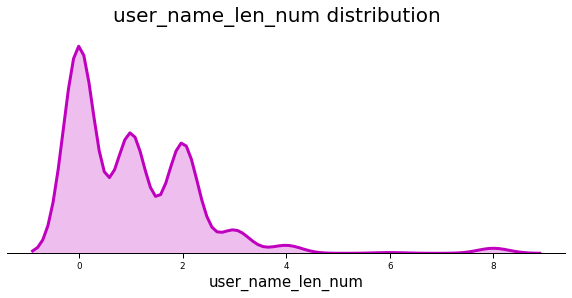

In [53]:
plot_feature(df, 'user_name_len_num')

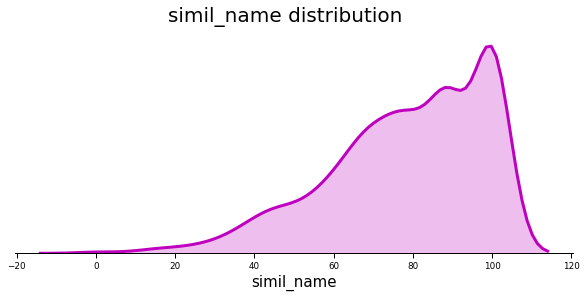

In [23]:
plot_feature(df, 'simil_name')

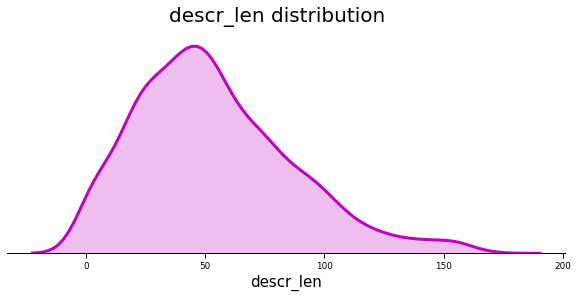

In [35]:
plot_feature(df, 'descr_len')

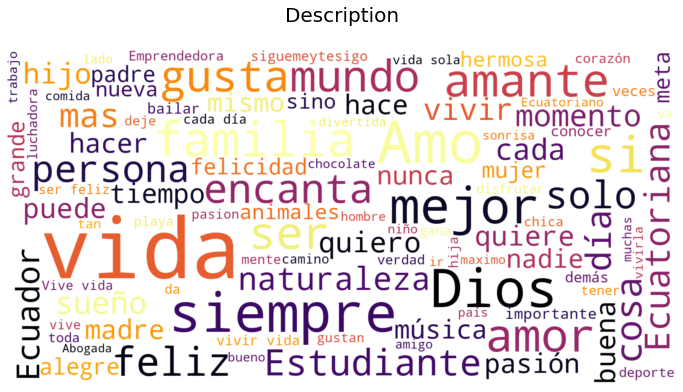

In [33]:
word_cloud(df.description, 'Description', 100)

## Comparing with Chile 2017 user dataset

In [78]:
ls ../data

50_user_metrics_final.csv
Ecuador bots account info 10.30.2019.xlsx


In [81]:
df_user = pd.read_csv("../data/50_user_metrics_final.csv", lineterminator='\n', low_memory=False)
df_user.shape

(91154, 33)

In [82]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91154 entries, 0 to 91153
Data columns (total 33 columns):
Unnamed: 0             91154 non-null int64
user                   91154 non-null object
default_prof_image     91154 non-null int64
acc_verif              91154 non-null int64
local_bol              91154 non-null int64
default_profile        91154 non-null int64
descr_bol              91154 non-null int64
active_acc             91154 non-null int64
tws_cnt                91154 non-null float64
frs_cnt                91154 non-null float64
fols_cnt               91154 non-null float64
fav_cnt                91154 non-null float64
tweets_analysed        91154 non-null float64
account_age_days       91154 non-null float64
ave_acc_tw_day         91154 non-null int64
ave_recent_tw_day      91154 non-null int64
max_tweet_day          91154 non-null float64
ment_tweets_cnt        91154 non-null float64
hash_tweets_cnt        91154 non-null float64
unique_mentions_cnt    91154 non-nul

In [110]:
del df_user['Unnamed: 0']

In [107]:
df_user.acc_verif.value_counts()

0    90993
1      161
Name: acc_verif, dtype: int64

In [204]:
df_user.descr_bol.value_counts()

1    62719
0    28435
Name: descr_bol, dtype: int64

### Filtering by account age (during 2017, low frequency and non-verified)

In [191]:
chile_17 = df_user[(df_user.account_age_days < 300) 
                   & (df_user.acc_verif == 0)
                   & (df_user.max_tweet_day < 50)]
chile_17.shape

(12866, 32)

In [192]:
chile_17.describe().T

,count,mean,std,min,25%,50%,75%,max
default_prof_image,12866,0,0,0,0,0,1,1
acc_verif,12866,0,0,0,0,0,0,0
local_bol,12866,0,0,0,0,0,1,1
default_profile,12866,1,0,0,1,1,1,1
descr_bol,12866,0,0,0,0,0,1,1
active_acc,12866,1,0,0,1,1,1,1
tws_cnt,12866,653,4886,1,7,41,234,281726
frs_cnt,12866,165,394,0,32,71,139,16408
fols_cnt,12866,52,305,0,1,6,23,16067
fav_cnt,12866,504,2640,0,3,26,198,117458


In [206]:
chile_17.descr_bol.value_counts()

0    7048
1    5818
Name: descr_bol, dtype: int64

In [206]:
chile_17.descr_bol.value_counts()

0    7048
1    5818
Name: descr_bol, dtype: int64

In [126]:
ecuat_19 = df.copy()

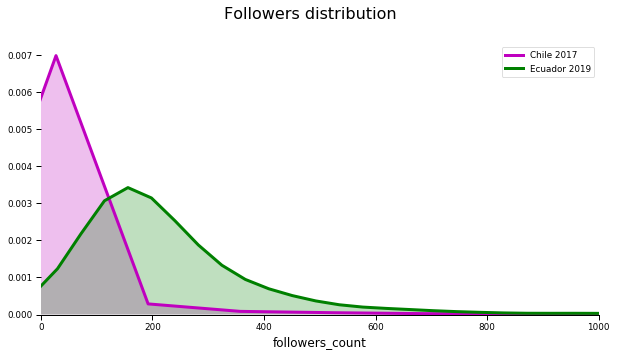

In [193]:
feat1 = chile_17.fols_cnt
feat2 = ecuat_19.followers_count
plot_feat_comp(feat1, feat2, 'Followers', 1000)

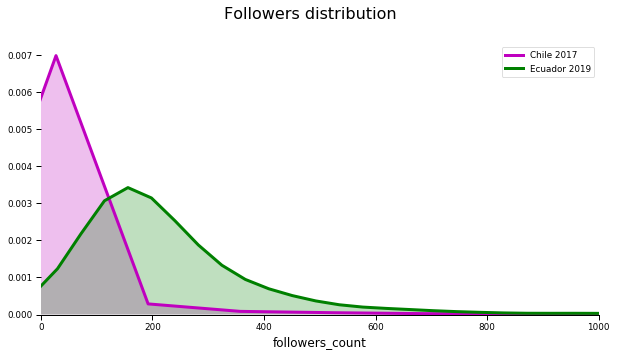

In [193]:
feat1 = chile_17.fols_cnt
feat2 = ecuat_19.followers_count
plot_feat_comp(feat1, feat2, 'Followers', 1000)

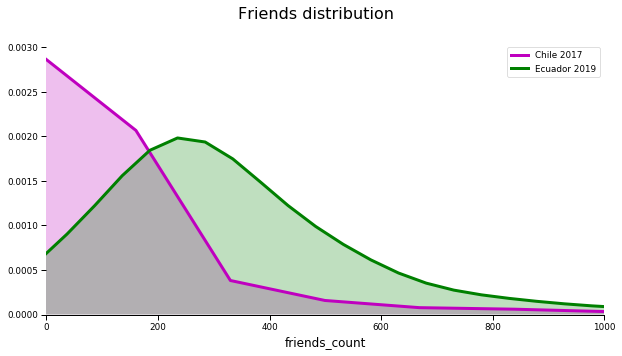

In [194]:
feat1 = chile_17.frs_cnt
feat2 = ecuat_19.friends_count
plot_feat_comp(feat1, feat2, 'Friends', 1000)

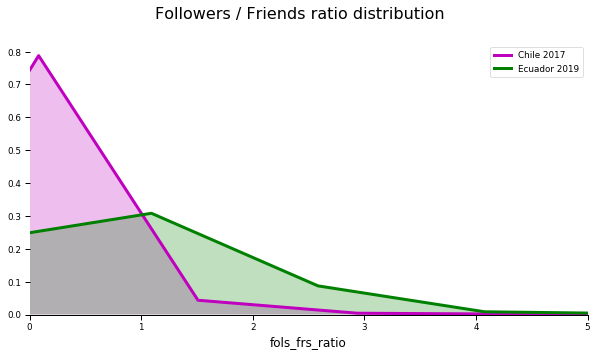

In [203]:
feat1 = chile_17.fols_frs_ratio
feat2 = ecuat_19.fols_frs_ratio
plot_feat_comp(feat1, feat2, 'Followers / Friends ratio', 5)

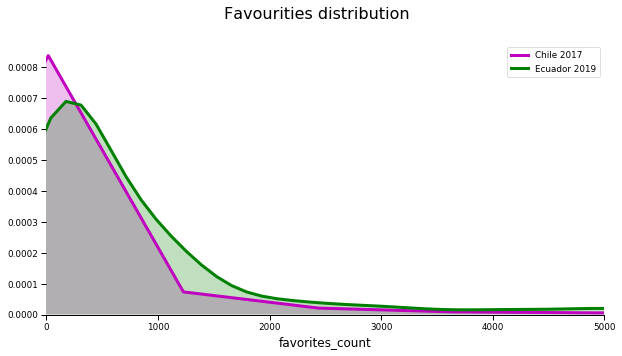

In [195]:
feat1 = chile_17.fav_cnt
feat2 = ecuat_19.favorites_count
plot_feat_comp(feat1, feat2, 'Favourities', 5000)

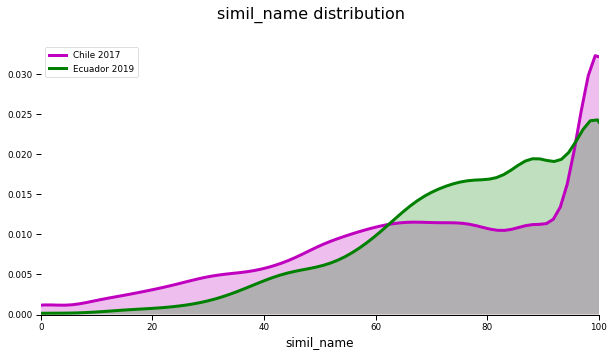

In [196]:
feat1 = chile_17.simil_name
feat2 = ecuat_19.simil_name
plot_feat_comp(feat1, feat2, 'simil_name', 100)

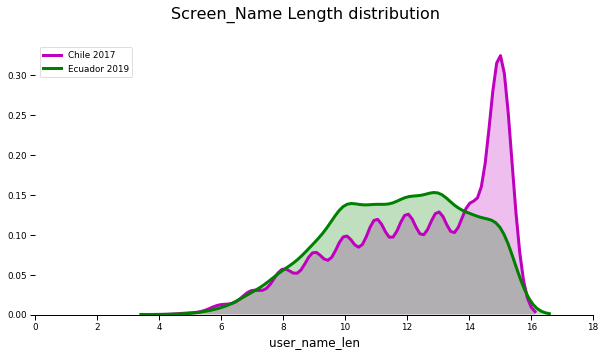

In [197]:
feat1 = chile_17.user_name_len
feat2 = ecuat_19.user_name_len
plot_feat_comp(feat1, feat2, 'Screen_Name Length', 18)

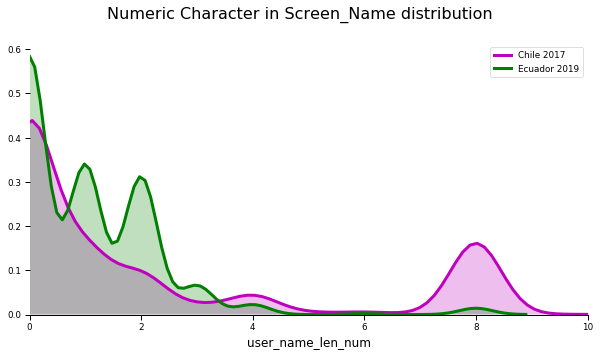

In [198]:
feat1 = chile_17.user_name_len_num
feat2 = ecuat_19.user_name_len_num
plot_feat_comp(feat1, feat2, 'Numeric Character in Screen_Name', 10)

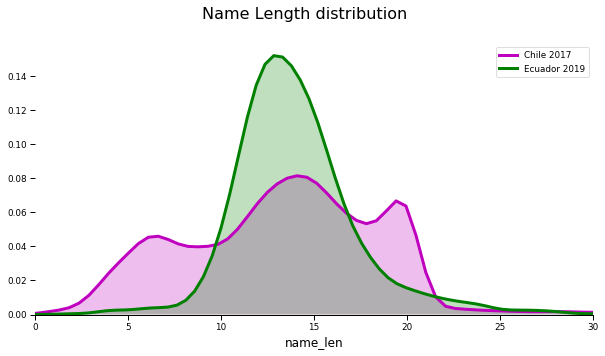

In [199]:
feat1 = chile_17.name_len
feat2 = ecuat_19.name_len
plot_feat_comp(feat1, feat2, 'Name Length', 30)

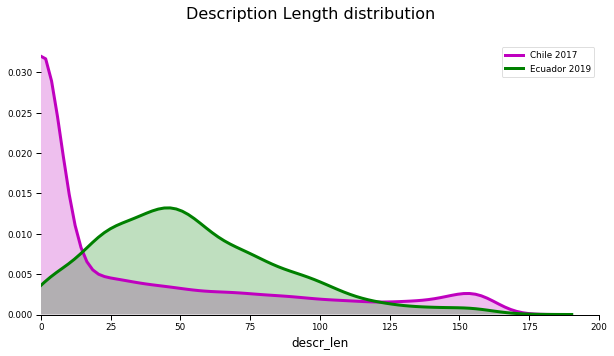

In [200]:
feat1 = chile_17.descr_len
feat2 = ecuat_19.descr_len
plot_feat_comp(feat1, feat2, 'Description Length', 200)